In [2]:
import pandas as pd
import json
import pprint
import matplotlib.pyplot as plt
import numpy as np

In [3]:
curr_dir = "./data/SoccerNetGS/test/SNGS-116/"

In [4]:
with open('data/SoccerNetGS/test/SNGS-116/Labels-GameState.json') as f:
    data = json.load(f)

In [5]:
for key in data:
    print(key)

info
images
annotations
categories


In [6]:
notes_df = pd.DataFrame(data["annotations"])
print(notes_df.columns)
# print(pd.DataFrame(data["info"]).columns)
print(pd.DataFrame(data["images"]).columns)
print(pd.DataFrame(data["categories"]).columns)
display(notes_df)

Index(['id', 'image_id', 'track_id', 'supercategory', 'category_id',
       'attributes', 'bbox_image', 'bbox_pitch', 'bbox_pitch_raw', 'lines'],
      dtype='object')
Index(['is_labeled', 'image_id', 'file_name', 'height', 'width',
       'has_labeled_person', 'has_labeled_pitch', 'has_labeled_camera',
       'ignore_regions_y', 'ignore_regions_x'],
      dtype='object')
Index(['supercategory', 'id', 'name', 'lines'], dtype='object')


,id,image_id,track_id,supercategory,category_id,attributes,bbox_image,bbox_pitch,bbox_pitch_raw,lines
0,3116000001,3116000001,1.0,object,1,"{'role': 'player', 'jersey': '4', 'team': 'left'}","{'x': 136, 'y': 520, 'x_center': 161.5, 'y_cen...","{'x_bottom_left': 29.248984434691206, 'y_botto...","{'x_bottom_left': 29.080245470992793, 'y_botto...",NaN
1,3116000002,3116000001,2.0,object,1,"{'role': 'player', 'jersey': '93', 'team': 'le...","{'x': 478, 'y': 565, 'x_center': 503.5, 'y_cen...","{'x_bottom_left': 30.48215393895095, 'y_bottom...","{'x_bottom_left': 30.46795200356605, 'y_bottom...",NaN
2,3116000003,3116000001,3.0,object,1,"{'role': 'player', 'jersey': '25', 'team': 'ri...","{'x': 565, 'y': 518, 'x_center': 589.0, 'y_cen...","{'x_bottom_left': 34.05922855899436, 'y_bottom...","{'x_bottom_left': 34.00504763725415, 'y_bottom...",NaN
3,3116000004,3116000001,4.0,object,3,"{'role': 'referee', 'jersey': None, 'team': None}","{'x': 468, 'y': 433, 'x_center': 491.0, 'y_cen...","{'x_bottom_left': 38.19082152471638, 'y_bottom...","{'x_bottom_left': 38.16749162328837, 'y_bottom...",NaN
4,3116000005,3116000001,5.0,object,1,"{'role': 'player', 'jersey': None, 'team': 'le...","{'x': 557, 'y': 302, 'x_center': 574.0, 'y_cen...","{'x_bottom_left': 54.15617004388591, 'y_bottom...","{'x_bottom_left': 54.13456101330073, 'y_bottom...",NaN
...,...,...,...,...,...,...,...,...,...,...
12205,3116012955,3116000750,24.0,object,1,"{'role': 'player', 'jersey': None, 'team': 'le...","{'x': 434, 'y': 299, 'x_center': 452.5, 'y_cen...","{'x_bottom_left': -12.58252360680884, 'y_botto...","{'x_bottom_left': -12.267164721122032, 'y_bott...",NaN
12206,3116012956,3116000750,25.0,object,3,"{'role': 'referee', 'jersey': None, 'team': None}","{'x': 300, 'y': 203, 'x_center': 315.5, 'y_cen...","{'x_bottom_left': -20.94330523598582, 'y_botto...","{'x_bottom_left': -21.064362760952484, 'y_bott...",NaN
12207,3116012957,3116000750,26.0,object,1,"{'role': 'player', 'jersey': None, 'team': 'le...","{'x': 0, 'y': 386, 'x_center': 20.5, 'y_center...","{'x_bottom_left': -17.6275437358005, 'y_bottom...","{'x_bottom_left': -17.25906567348779, 'y_botto...",NaN
12208,3116012958,3116000750,27.0,object,1,"{'role': 'player', 'jersey': '9', 'team': 'rig...","{'x': 80, 'y': 409, 'x_center': 101.0, 'y_cent...","{'x_bottom_left': -15.461383078022479, 'y_bott...","{'x_bottom_left': -15.278471477748276, 'y_bott...",NaN


In [7]:
print(notes_df.iloc[0]["bbox_image"])

{'x': 136, 'y': 520, 'x_center': 161.5, 'y_center': 587.5, 'w': 51, 'h': 135}


In [8]:
notes_df1 = pd.json_normalize(notes_df['attributes'])
display(notes_df1)

,role,jersey,team
0,player,4,left
1,player,93,left
2,player,25,right
3,referee,None,None
4,player,None,left
...,...,...,...
12205,player,None,left
12206,referee,None,None
12207,player,None,left
12208,player,9,right


In [9]:
notes_merged = pd.concat([notes_df, notes_df1], axis=1)
display(notes_merged)

,id,image_id,track_id,supercategory,category_id,attributes,bbox_image,bbox_pitch,bbox_pitch_raw,lines,role,jersey,team
0,3116000001,3116000001,1.0,object,1,"{'role': 'player', 'jersey': '4', 'team': 'left'}","{'x': 136, 'y': 520, 'x_center': 161.5, 'y_cen...","{'x_bottom_left': 29.248984434691206, 'y_botto...","{'x_bottom_left': 29.080245470992793, 'y_botto...",NaN,player,4,left
1,3116000002,3116000001,2.0,object,1,"{'role': 'player', 'jersey': '93', 'team': 'le...","{'x': 478, 'y': 565, 'x_center': 503.5, 'y_cen...","{'x_bottom_left': 30.48215393895095, 'y_bottom...","{'x_bottom_left': 30.46795200356605, 'y_bottom...",NaN,player,93,left
2,3116000003,3116000001,3.0,object,1,"{'role': 'player', 'jersey': '25', 'team': 'ri...","{'x': 565, 'y': 518, 'x_center': 589.0, 'y_cen...","{'x_bottom_left': 34.05922855899436, 'y_bottom...","{'x_bottom_left': 34.00504763725415, 'y_bottom...",NaN,player,25,right
3,3116000004,3116000001,4.0,object,3,"{'role': 'referee', 'jersey': None, 'team': None}","{'x': 468, 'y': 433, 'x_center': 491.0, 'y_cen...","{'x_bottom_left': 38.19082152471638, 'y_bottom...","{'x_bottom_left': 38.16749162328837, 'y_bottom...",NaN,referee,None,None
4,3116000005,3116000001,5.0,object,1,"{'role': 'player', 'jersey': None, 'team': 'le...","{'x': 557, 'y': 302, 'x_center': 574.0, 'y_cen...","{'x_bottom_left': 54.15617004388591, 'y_bottom...","{'x_bottom_left': 54.13456101330073, 'y_bottom...",NaN,player,None,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,3116012955,3116000750,24.0,object,1,"{'role': 'player', 'jersey': None, 'team': 'le...","{'x': 434, 'y': 299, 'x_center': 452.5, 'y_cen...","{'x_bottom_left': -12.58252360680884, 'y_botto...","{'x_bottom_left': -12.267164721122032, 'y_bott...",NaN,player,None,left
12206,3116012956,3116000750,25.0,object,3,"{'role': 'referee', 'jersey': None, 'team': None}","{'x': 300, 'y': 203, 'x_center': 315.5, 'y_cen...","{'x_bottom_left': -20.94330523598582, 'y_botto...","{'x_bottom_left': -21.064362760952484, 'y_bott...",NaN,referee,None,None
12207,3116012957,3116000750,26.0,object,1,"{'role': 'player', 'jersey': None, 'team': 'le...","{'x': 0, 'y': 386, 'x_center': 20.5, 'y_center...","{'x_bottom_left': -17.6275437358005, 'y_bottom...","{'x_bottom_left': -17.25906567348779, 'y_botto...",NaN,player,None,left
12208,3116012958,3116000750,27.0,object,1,"{'role': 'player', 'jersey': '9', 'team': 'rig...","{'x': 80, 'y': 409, 'x_center': 101.0, 'y_cent...","{'x_bottom_left': -15.461383078022479, 'y_bott...","{'x_bottom_left': -15.278471477748276, 'y_bott...",NaN,player,9,right


In [10]:
print(notes_merged.iloc[0]["bbox_pitch"])

{'x_bottom_left': 29.248984434691206, 'y_bottom_left': -5.324346364211027, 'x_bottom_right': 29.723592160879964, 'y_bottom_right': -4.9621083756, 'x_bottom_middle': 29.486149171470732, 'y_bottom_middle': -5.1433335618981015}


In [11]:
print(notes_merged.role.unique())
print(notes_merged.supercategory.unique())

['player' 'referee' 'goalkeeper' 'ball' nan]
['object' 'pitch']


In [12]:
pitch = notes_merged[notes_merged["supercategory"] == "pitch"]

In [13]:
detections = notes_merged[notes_merged["image_id"] == '3116000001']
objects_img1 = detections[detections["supercategory"] == "object"]
display(objects_img1["bbox_image"])

0     {'x': 136, 'y': 520, 'x_center': 161.5, 'y_cen...
1     {'x': 478, 'y': 565, 'x_center': 503.5, 'y_cen...
2     {'x': 565, 'y': 518, 'x_center': 589.0, 'y_cen...
3     {'x': 468, 'y': 433, 'x_center': 491.0, 'y_cen...
4     {'x': 557, 'y': 302, 'x_center': 574.0, 'y_cen...
5     {'x': 935, 'y': 548, 'x_center': 964.5, 'y_cen...
6     {'x': 981, 'y': 541, 'x_center': 1015.5, 'y_ce...
7     {'x': 1061, 'y': 488, 'x_center': 1081.0, 'y_c...
8     {'x': 1096, 'y': 487, 'x_center': 1128.0, 'y_c...
9     {'x': 1288, 'y': 457, 'x_center': 1314.5, 'y_c...
10    {'x': 1387, 'y': 432, 'x_center': 1403.0, 'y_c...
11    {'x': 1419, 'y': 425, 'x_center': 1437.5, 'y_c...
12    {'x': 1433, 'y': 452, 'x_center': 1465.5, 'y_c...
13    {'x': 1461, 'y': 446, 'x_center': 1477.5, 'y_c...
14    {'x': 1457, 'y': 446, 'x_center': 1470.5, 'y_c...
15    {'x': 1479, 'y': 449, 'x_center': 1493.5, 'y_c...
16    {'x': 1498, 'y': 444, 'x_center': 1509.5, 'y_c...
17    {'x': 1511, 'y': 443, 'x_center': 1532.0, 

In [14]:
display(pitch)

,id,image_id,track_id,supercategory,category_id,attributes,bbox_image,bbox_pitch,bbox_pitch_raw,lines,role,jersey,team
20,3116000021,3116000001,NaN,pitch,5,NaN,NaN,NaN,NaN,"{'Side line top': [{'x': 0.0, 'y': 0.385512962...",NaN,NaN,NaN
41,3116000043,3116000002,NaN,pitch,5,NaN,NaN,NaN,NaN,"{'Side line top': [{'x': 0.0, 'y': 0.385512962...",NaN,NaN,NaN
62,3116000065,3116000003,NaN,pitch,5,NaN,NaN,NaN,NaN,"{'Side line top': [{'x': 0.0, 'y': 0.385512962...",NaN,NaN,NaN
83,3116000087,3116000004,NaN,pitch,5,NaN,NaN,NaN,NaN,"{'Side line top': [{'x': 0.0, 'y': 0.385512962...",NaN,NaN,NaN
104,3116000109,3116000005,NaN,pitch,5,NaN,NaN,NaN,NaN,"{'Side line top': [{'x': 0.0, 'y': 0.385512962...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12129,3116012875,3116000746,NaN,pitch,5,NaN,NaN,NaN,NaN,{'Side line top': [{'x': 6.167905692361981e-18...,NaN,NaN,NaN
12149,3116012896,3116000747,NaN,pitch,5,NaN,NaN,NaN,NaN,{'Side line top': [{'x': 7.401486830834377e-18...,NaN,NaN,NaN
12169,3116012917,3116000748,NaN,pitch,5,NaN,NaN,NaN,NaN,{'Side line top': [{'x': 8.635067969306773e-18...,NaN,NaN,NaN
12189,3116012938,3116000749,NaN,pitch,5,NaN,NaN,NaN,NaN,"{'Side line top': [{'x': 9.86864910777917e-18,...",NaN,NaN,NaN


In [15]:
print(pitch.iloc[0]["image_id"])
print(pitch.iloc[0]["lines"])

3116000001
{'Side line top': [{'x': 0.0, 'y': 0.385512962962963}, {'x': 0.12891666666666668, 'y': 0.37255000000000005}, {'x': 0.15859335937500002, 'y': 0.3692706018518519}, {'x': 0.18827005208333333, 'y': 0.3659912037037038}, {'x': 0.24762343750000002, 'y': 0.3594324074074074}], 'Side line right': [{'x': 0.25053125, 'y': 0.3595870370370371}, {'x': 0.5435, 'y': 0.4341240740740741}, {'x': 0.83646875, 'y': 0.5086611111111111}, {'x': 1.0, 'y': 0.5487842592592592}], 'Big rect. right top': [{'x': 0.04428107638888889, 'y': 0.46575987654321}, {'x': 0.2463644097222222, 'y': 0.43859922839506177}, {'x': 0.4432394097222222, 'y': 0.41143858024691354}], 'Big rect. right main': [{'x': 0.046104166666666654, 'y': 0.46714814814814815}, {'x': 0.17872135416666665, 'y': 0.5152962962962963}, {'x': 0.31133854166666663, 'y': 0.5634444444444444}, {'x': 0.5765729166666667, 'y': 0.6597407407407407}, {'x': 1.0, 'y': 0.8177657407407406}], 'Small rect. right top': [{'x': 0.638421875, 'y': 0.46012685185185187}, {'x'

In [16]:
pprint.pprint(pitch.iloc[700]["lines"])

{'Circle central': [{'x': 1.0, 'y': 0.540158950617284},
                    {'x': 0.9891979166666667, 'y': 0.5443256172839507},
                    {'x': 0.9763505208333334, 'y': 0.5488006172839506},
                    {'x': 0.9558645833333334, 'y': 0.5545108024691359},
                    {'x': 0.9348572916666666, 'y': 0.5596033950617286},
                    {'x': 0.91003125, 'y': 0.5640783950617281},
                    {'x': 0.8786072916666666, 'y': 0.5688626543209875},
                    {'x': 0.848659375, 'y': 0.5721033950617281},
                    {'x': 0.8227916666666667, 'y': 0.5728746913580244},
                    {'x': 0.7962291666666667, 'y': 0.5738006172839503},
                    {'x': 0.7661072916666666, 'y': 0.573492283950617},
                    {'x': 0.733034375, 'y': 0.5714858024691355},
                    {'x': 0.7105520833333333, 'y': 0.5707145061728393},
                    {'x': 0.6819927083333333, 'y': 0.5663932098765428},
                    {'x': 0.654

In [17]:
pprint.pprint(pitch.iloc[0]["lines"])

{'Big rect. right main': [{'x': 0.046104166666666654, 'y': 0.46714814814814815},
                          {'x': 0.17872135416666665, 'y': 0.5152962962962963},
                          {'x': 0.31133854166666663, 'y': 0.5634444444444444},
                          {'x': 0.5765729166666667, 'y': 0.6597407407407407},
                          {'x': 1.0, 'y': 0.8177657407407406}],
 'Big rect. right top': [{'x': 0.04428107638888889, 'y': 0.46575987654321},
                         {'x': 0.2463644097222222, 'y': 0.43859922839506177},
                         {'x': 0.4432394097222222, 'y': 0.41143858024691354}],
 'Circle right': [{'x': 0.25660781250000003, 'y': 0.5423027777777778},
                  {'x': 0.2524411458333333, 'y': 0.5467009259259259},
                  {'x': 0.2472328125, 'y': 0.552487962962963},
                  {'x': 0.24423802083333335, 'y': 0.5557287037037038},
                  {'x': 0.24111302083333333, 'y': 0.5605898148148147},
                  {'x': 0.23915989583333

In [18]:
points_dict = pitch.iloc[0]["lines"]
pts = []
for a_dict in points_dict["Circle right"]:
    pts.append([a_dict['x'], a_dict['y']])

In [19]:
print(pts)

[[0.25660781250000003, 0.5423027777777778], [0.2524411458333333, 0.5467009259259259], [0.2472328125, 0.552487962962963], [0.24423802083333335, 0.5557287037037038], [0.24111302083333333, 0.5605898148148147], [0.23915989583333333, 0.5647564814814814], [0.23785781250000002, 0.5686916666666666], [0.23720677083333333, 0.5726268518518518], [0.23755364583333333, 0.5758675925925925], [0.23894270833333334, 0.5820407407407407], [0.24189427083333334, 0.5886759259259259], [0.247796875, 0.5954666666666667], [0.2549151041666667, 0.6014851851851852], [0.26932447916666663, 0.6108981481481481], [0.29033177083333334, 0.6210833333333333], [0.32401197916666663, 0.631886111111111], [0.36758854166666666, 0.6423796296296296], [0.41932447916666665, 0.6516388888888889], [0.4645505208333333, 0.6567314814814814], [0.5098630208333333, 0.6601268518518517], [0.5794807291666667, 0.6625962962962963]]


In [20]:
# images_df = pd.DataFrame(data["images"])
# display(images_df)

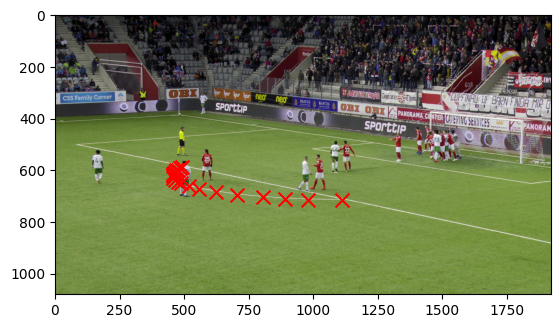

In [21]:
image = plt.imread(curr_dir + "/img1/000001.jpg")
height, width = image.shape[:2]
pts = np.array(pts)

pixel_coords = pts * [width, height]

plt.imshow(image)
# plt.plot(640, 570, "og", markersize=10)  # og:shorthand for green circle
plt.scatter(pixel_coords[:, 0], pixel_coords[:, 1], marker="x", color="red", s=100)
plt.show()

In [22]:
# import sys
# import os

# # Add the plugins directory to the system path
# plugins_directory = '/Users/emilyw/College_Pt_2/S1/Big_Data_Analytics/Final_Proj/Test_Implementations/soccernet/sn-gamestate/plugins/calibration/'
# sys.path.append(plugins_directory)

In [27]:
import sn_gamestate
import cv2
# import sn_calibration_baseline
# import plugins.calibration.sn_calibration_baseline
from sn_gamestate.visualization.pitch import draw_radar_view

# from tracklab.utils.cv2 import cv2_load_image

image = cv2.imread(curr_dir + "/img1/000001.jpg")
patch = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detections = notes_merged.head(1)[["bbox_pitch", "role", "jersey", "team"]]
display(detections)
# print(notes_merged.head(1))
scale = 3

draw_radar_view(patch, detections, scale, delta=32, group="ground truth")



,bbox_pitch,role,jersey,team
0,"{'x_bottom_left': 29.248984434691206, 'y_botto...",player,4,left


In [28]:
pprint.pprint(notes_merged.iloc[0]["bbox_image"])
pprint.pprint(notes_merged.iloc[0]["bbox_pitch"])

{'h': 135, 'w': 51, 'x': 136, 'x_center': 161.5, 'y': 520, 'y_center': 587.5}
{'x_bottom_left': 29.248984434691206,
 'x_bottom_middle': 29.486149171470732,
 'x_bottom_right': 29.723592160879964,
 'y_bottom_left': -5.324346364211027,
 'y_bottom_middle': -5.1433335618981015,
 'y_bottom_right': -4.9621083756}


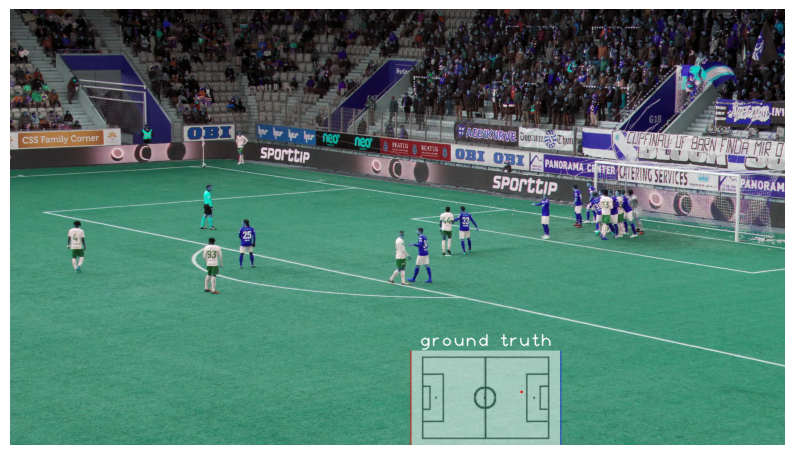

In [29]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the image display
plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.axis('off')  # Hide axes
plt.show()  # Display the image in the notebook

{'x': 136, 'y': 520, 'x_center': 161.5, 'y_center': 587.5, 'w': 51, 'h': 135}


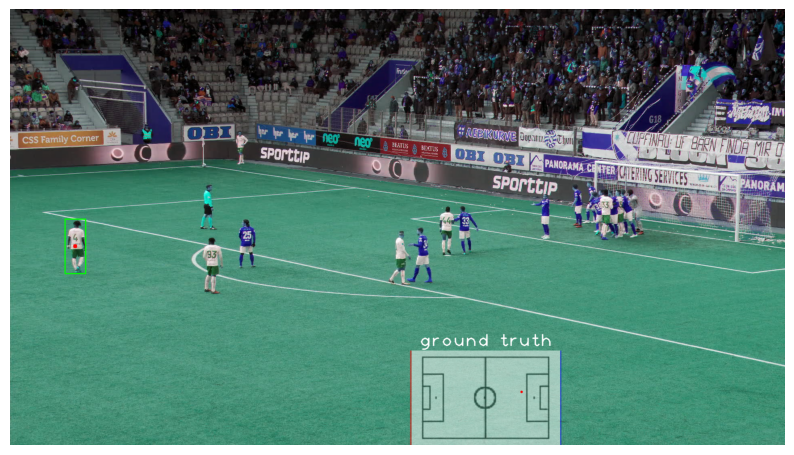

In [26]:

# Provided bounding box details
bbox = notes_merged.iloc[0]["bbox_image"]
print(bbox)
# image = cv2.imread(curr_dir + "/img1/000001.jpg")
# patch = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Coordinates of the top-left and bottom-right corners
top_left = (int(bbox["x"]), int(bbox["y"]))
bottom_right = (int(bbox["x"] + bbox["w"]), int(bbox["y"] + bbox["h"]))

# Draw the rectangle on the patch (image)
cv2.rectangle(patch, top_left, bottom_right, (0, 255, 0), 2)  # Green color, 2px thickness

# Optionally, you can also draw the center point if needed
center = (int(bbox["x_center"]), int(bbox["y_center"]))
cv2.circle(patch, center, 5, (0, 0, 255), -1)  # Red color, filled circle

# Show the result (use this in an interactive session, like Jupyter)
# cv2.imshow("Bounding Box", patch)  # In a normal Python script
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the image display
plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.axis('off')  # Hide axes
plt.show()  # Display the image in the notebook
